In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv("C:/regular/income/income.csv",delimiter=',')
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,?,148657,Preschool,1,Married-civ-spouse,?,Wife,White,Female,0,0,40,Mexico,<=50K
5,63,Private,111963,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,16,United-States,<=50K
6,25,Private,207875,7th-8th,4,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,Mexico,<=50K
7,71,Local-gov,229110,HS-grad,9,Widowed,Exec-managerial,Other-relative,White,Female,0,0,33,United-States,<=50K
8,37,Private,66686,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
9,44,Private,227399,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,40,United-States,<=50K


In [11]:
df.columns = df.columns.str.replace(".","_")

print(df.isnull().sum())
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.dtypes)
print(df.nunique())



age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64
12
age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object
age                  73
workclass             9
fnlwgt            17876
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        117
capital_loss         90
hours_p

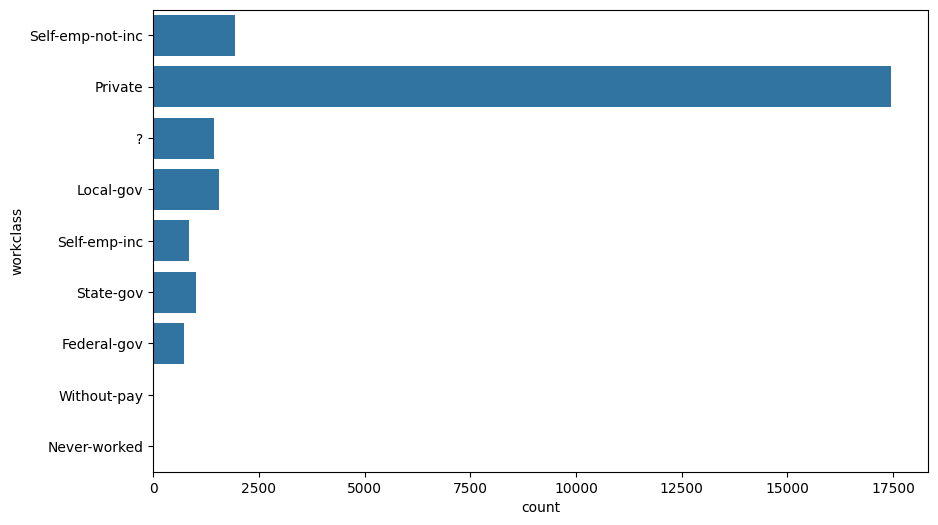

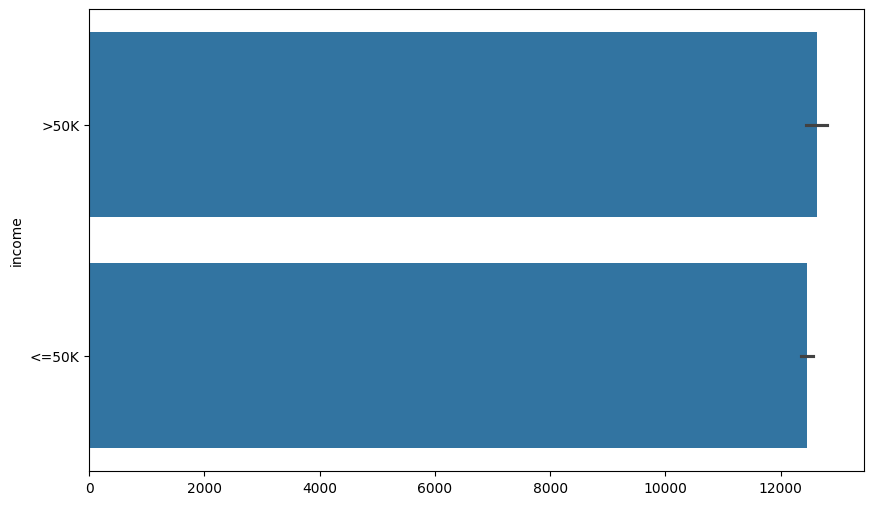

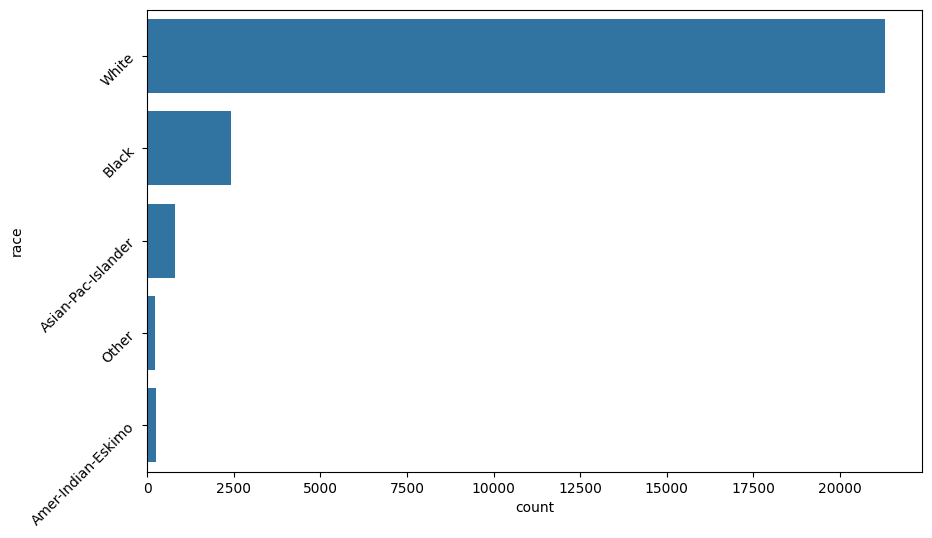

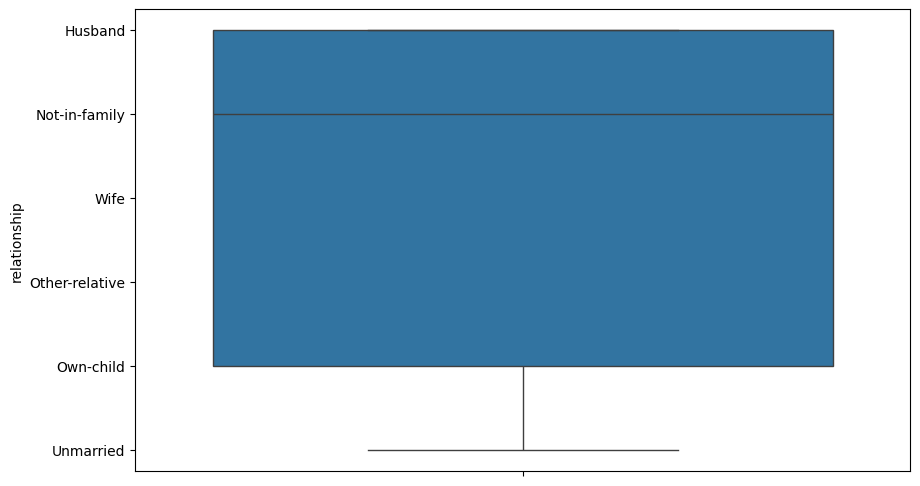

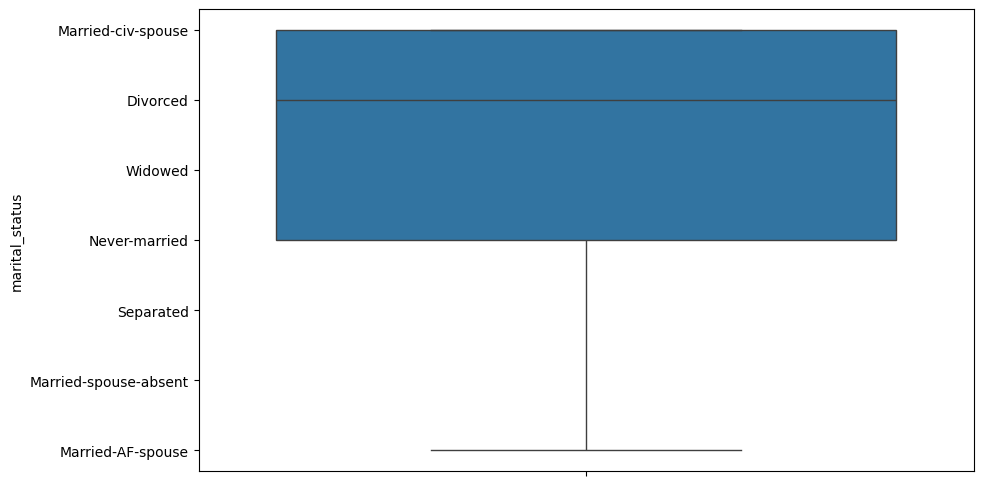

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(df['workclass'])
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(df['income'])
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(df['race'])
plt.yticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(df['relationship'])
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(df['marital_status'])
plt.show()

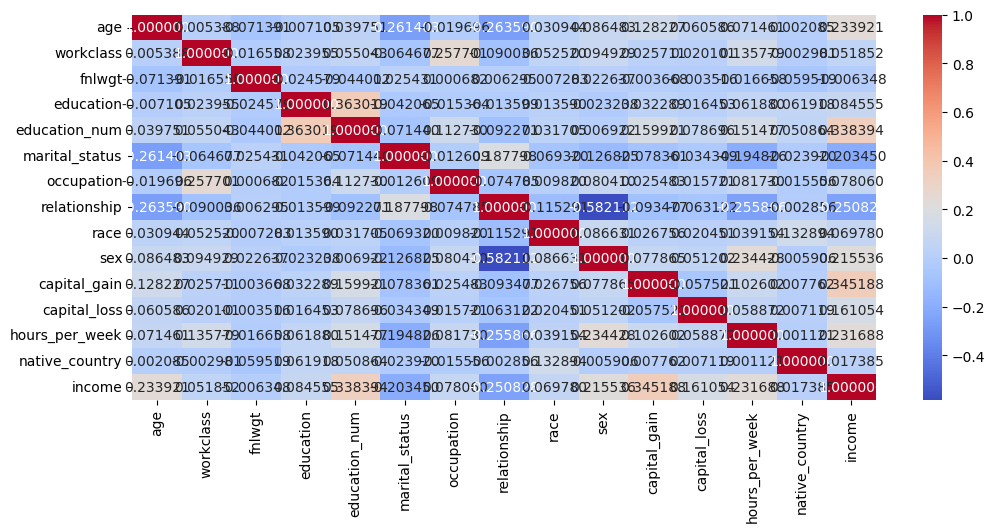

In [13]:
df1 = df.copy()
le = LabelEncoder()

for i in df1:
    df1[i] = le.fit_transform(df1[i])


plt.figure(figsize=(12,5))
sns.heatmap(df1.corr(),fmt='f',annot=True,cmap="coolwarm")
plt.show()

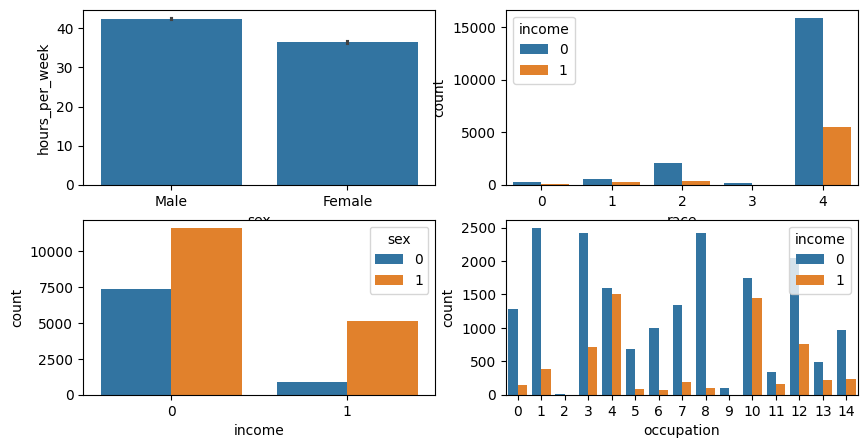

In [14]:
df['income'] = [1 if X == ">50K" else 0 for X in df['income']]


fig,axs = plt.subplots(2,2,figsize=(10,5))
sns.barplot(x='sex',y='hours_per_week',ax=axs[0,0],data=df)
sns.countplot(x='race',ax=axs[0,1],data=df1,hue='income')
sns.countplot(x='income',ax=axs[1,0],data=df1,hue='sex')
sns.countplot(x='occupation',ax=axs[1,1],data=df1,hue='income')
plt.show()

In [15]:
X = df.drop("income",axis=1)
y = df['income']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)



ct = make_column_transformer(
    (OneHotEncoder(sparse_output=False),X.select_dtypes(include='object').columns),
    (StandardScaler(),X.select_dtypes(include=['float32','int64']).columns),remainder='passthrough')

ct.fit_transform(X)

models = {
    "LogisticRegression":LogisticRegression(),
    "RandomForestClassifier":RandomForestClassifier(),
    "GradientBosstingClassifier":GradientBoostingClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "KNneighbors":KNeighborsClassifier()
    }

def evaluate_models(X_train,X_test,y_train,y_test,model):
    pipe = make_pipeline(ct,model).fit(X_train,y_train)
    pred = pipe.predict(X_test)
    pred_prob = pipe.predict_proba(X_test)[:,1]
    acc = accuracy_score(y_test,pred)
    roc = roc_auc_score(y_test,pred_prob)
    print(f'{model.__class__.__name__}; --Accuracy Score-- {acc*100:.2f}%; --ROC-- {roc*100:.2f}%')
    return pred,pred_prob


for model_name,model in models.items():
    print(f'results: {model_name}')
    pred,pred_prob = evaluate_models(X_train, X_test, y_train, y_test, model)


results: LogisticRegression
LogisticRegression; --Accuracy Score-- 85.77%; --ROC-- 90.72%
results: RandomForestClassifier
RandomForestClassifier; --Accuracy Score-- 85.45%; --ROC-- 90.36%
results: GradientBosstingClassifier
GradientBoostingClassifier; --Accuracy Score-- 86.79%; --ROC-- 92.08%
results: DecisionTreeClassifier
DecisionTreeClassifier; --Accuracy Score-- 81.77%; --ROC-- 74.36%
results: KNneighbors
KNeighborsClassifier; --Accuracy Score-- 83.39%; --ROC-- 85.97%


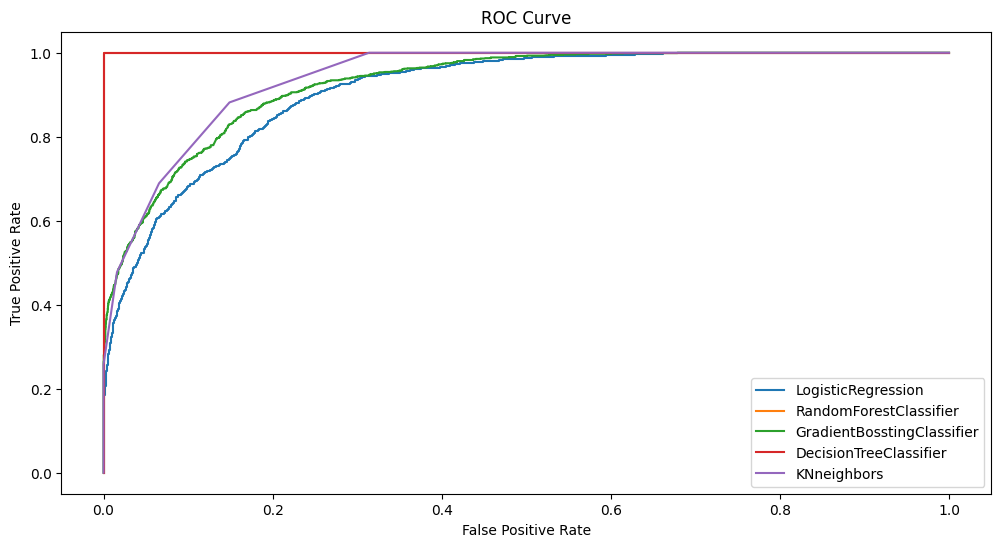

In [16]:
def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(12,6))
    
    for model_name, model in models.items():
        pipe = make_pipeline(ct,model).fit(X,y)
        pred_prob = pipe.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, pred_prob)
        plt.plot(fpr, tpr, label=model_name)
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()


plot_roc_curve(models, X_test, y_test)

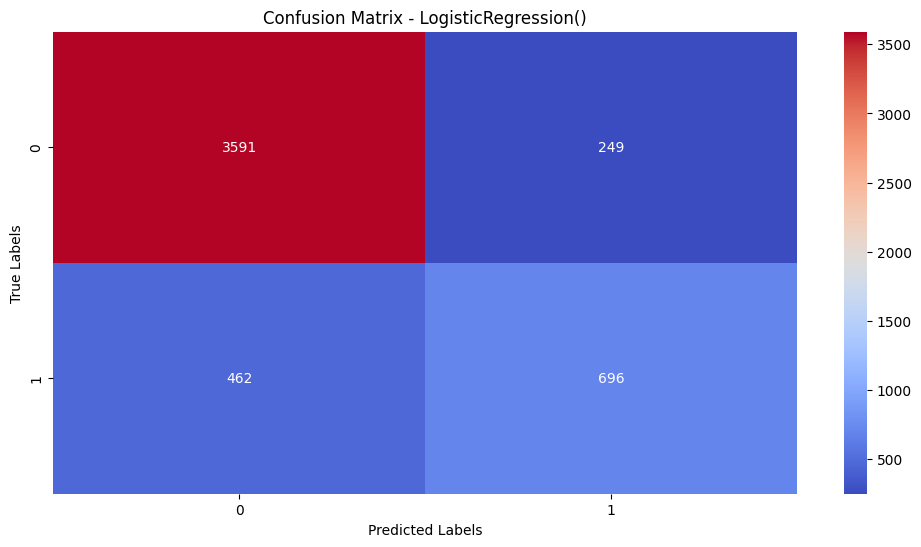

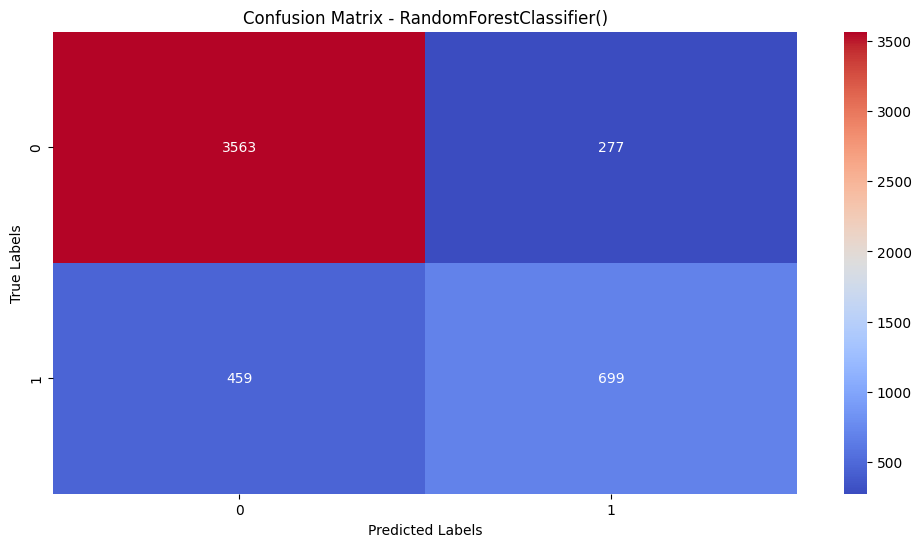

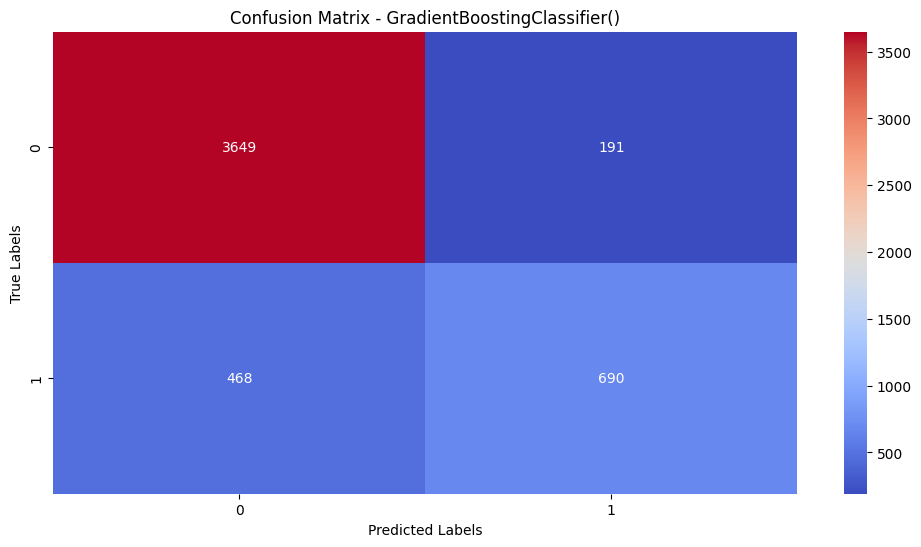

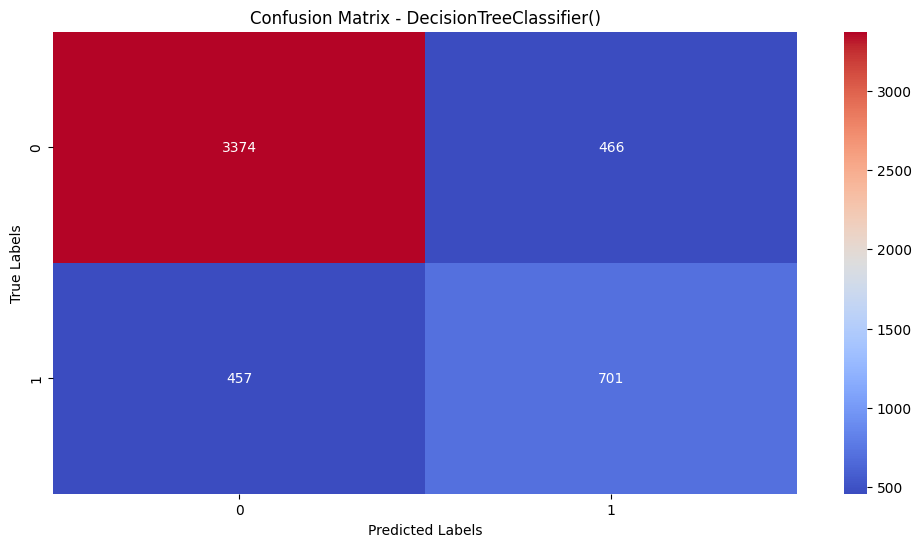

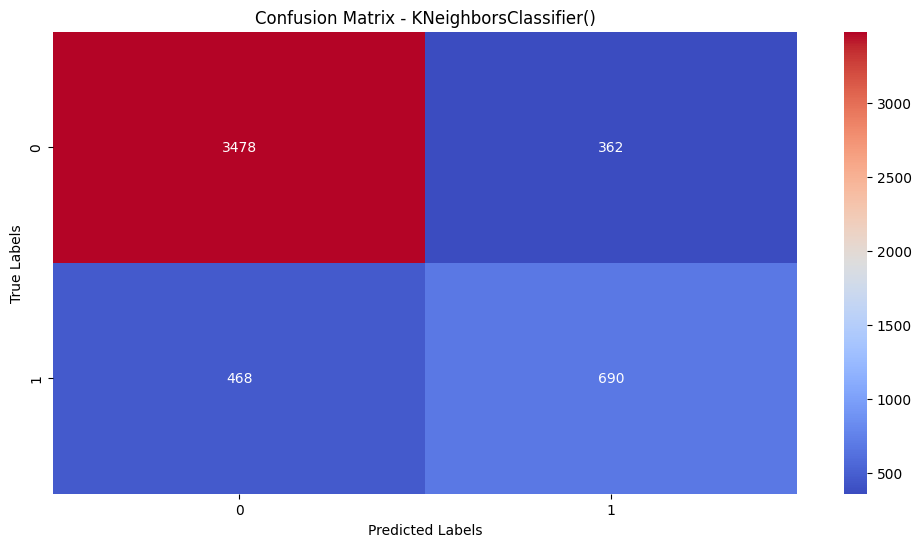

In [17]:
def plot_confusion_matrix(y_test, y_pred, models):
    conmap = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12,6))
    sns.heatmap(conmap,annot=True,fmt='d',cmap='coolwarm')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {models}')
    plt.show()




for model_name, model in models.items():

    pipe = make_pipeline(ct,model).fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    

    plot_confusion_matrix(y_test, y_pred, model)

In [18]:
def cv_scores(X,y,model):
    pipe = make_pipeline(ct,model).fit(X,y)
    cv_scores = cross_val_score(pipe, X,y,cv=10,scoring='roc_auc').max()
    print(f'{model.__class__.__name__}, --Ten Fold Cross-validation scores-- {cv_scores*100:.2f}%')
    return cv_scores


for model_name,model in models.items():
    print("Results from 10-fold cross-validation: ")
    scores = cv_scores(X, y, model)

Results from 10-fold cross-validation: 
LogisticRegression, --Ten Fold Cross-validation scores-- 91.62%
Results from 10-fold cross-validation: 
RandomForestClassifier, --Ten Fold Cross-validation scores-- 91.34%
Results from 10-fold cross-validation: 
GradientBoostingClassifier, --Ten Fold Cross-validation scores-- 93.26%
Results from 10-fold cross-validation: 
DecisionTreeClassifier, --Ten Fold Cross-validation scores-- 77.35%
Results from 10-fold cross-validation: 
KNeighborsClassifier, --Ten Fold Cross-validation scores-- 87.55%
